> **1. Non-negative matrix factorization (NMF)**

*Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features.* It works similar to PCA and can also be used for dimensionality reduction. As in PCA, we are trying to write each data point as a weighted sum of some components. But whereas in PCA we wanted components that were orthogonal and that explained as much variance of the data as possible, **in NMF, we want the components and the coefficients to be nonnegative**; that is, we want both the components and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative, ***as a non-negative sum of non-negative components cannot become negative.***

*The process of decomposing data into a non-negative weighted sum is particularly helpful for data that is created as the addition (or overlay) of several independent sources*, such as an audio track of multiple people speaking, or music with many instruments. In these situations, NMF can identify the original components that make up the combined data. **Overall, NMF leads to more interpretable components than PCA.**

Let’s say we are interested in a signal that is a combination of three different sources.

In [7]:
!pip3 install mglearn

Text(0, 0.5, 'Signal')

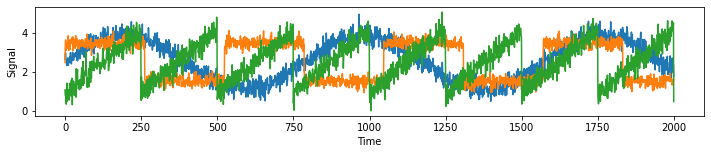

In [8]:
import mglearn
import matplotlib.pyplot as plt

S = mglearn.datasets.make_signals()
plt.figure(figsize=(12, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Unfortunately we cannot observe the original signals, but only an additive mixture of all three of them. We want to recover the decomposition of the mixed signal into the original components. **We assume that we have many different ways to observe the mixture (say 100 measurement devices)**, each of which provides us with a series of measurements:



In [9]:
# mix data into a 100-dimensional state
import numpy as np
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


We can use ***NMF to recover the three signals***:

In [10]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=3, random_state=42, max_iter=10000)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


**For comparison**, we also apply PCA:



In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

The figure shows the signal activity that was discovered by NMF and PCA:



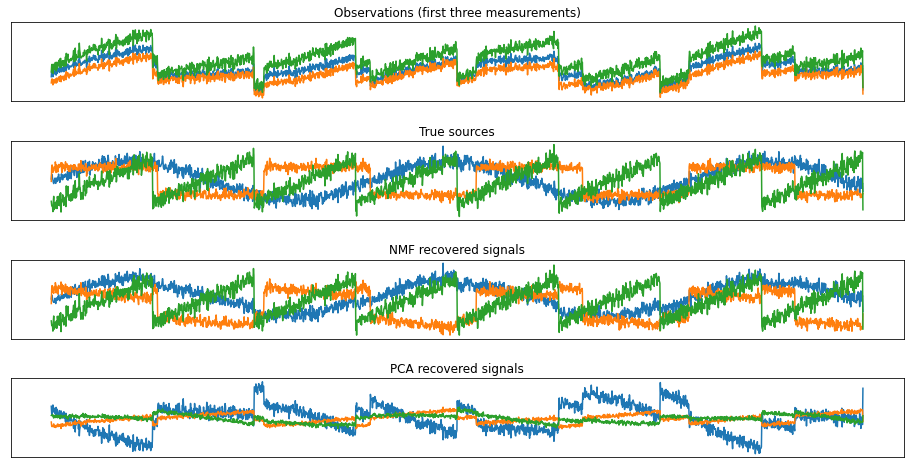

In [12]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(16, 8), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

The figure includes 3 of the 100 measurements from X for reference. As you can see, **NMF did a reasonable job of discovering the original sources, while PCA failed and used the first component to explain the majority of the variation in the data**. *Keep in mind that the components produced by NMF have no natural ordering.* In this example, the ordering of the NMF components is the same as in the original signal (see the shading of the three curves), but this is purely accidental.



> **2. t-Distributed Stochastic Neighbor Embedding (t-SNE)**

*While PCA is often a good first approach for transforming your data so that you might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness, as we saw with the scatter plot of the Labeled Faces in the Wild dataset.* ***There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings***, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

**The idea behind t-SNE** *is to find a two-dimensional representation of the data that preserves the distances between points as best as possible*. ***t-SNE starts with*** a random two-dimensional representation for each data point, and then *tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart.* ***t-SNE puts more emphasis*** on points that are close by, rather than preserving distances between far-apart points. In other words, ***it tries to preserve the information*** indicating which points are neighbors to each other.

We will apply the t-SNE manifold learning algorithm on a dataset of handwritten digits that is included in scikit-learn. Each data point in this dataset is an 8×8 grayscale image of a handwritten digit between 0 and 1. Figure shows an example image for each class:

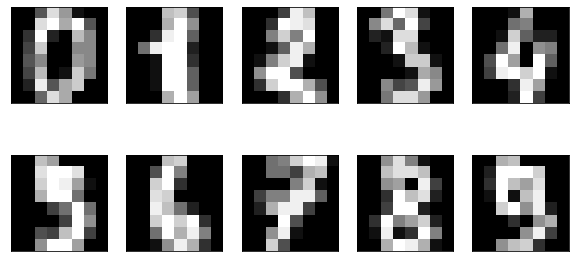

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap=plt.cm.gray)

Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two principal components, and color each dot by its class:



Text(0, 0.5, 'Second principal component')

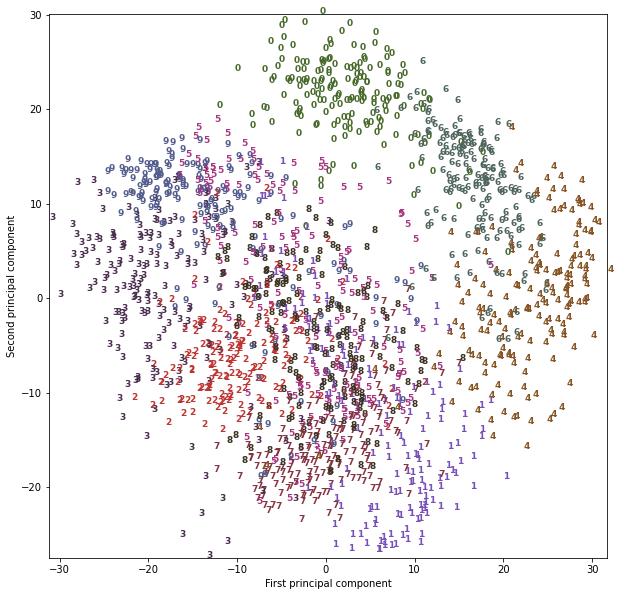

In [15]:
#build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Here, we actually used the true digit classes as glyphs, to show which class is where. ***The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly.***

Let’s apply t-SNE to the same dataset, and compare the results. We can call the fit_transform method, which will build the model and immediately return the transformed data:

Text(0.5, 0, 't-SNE feature 1')

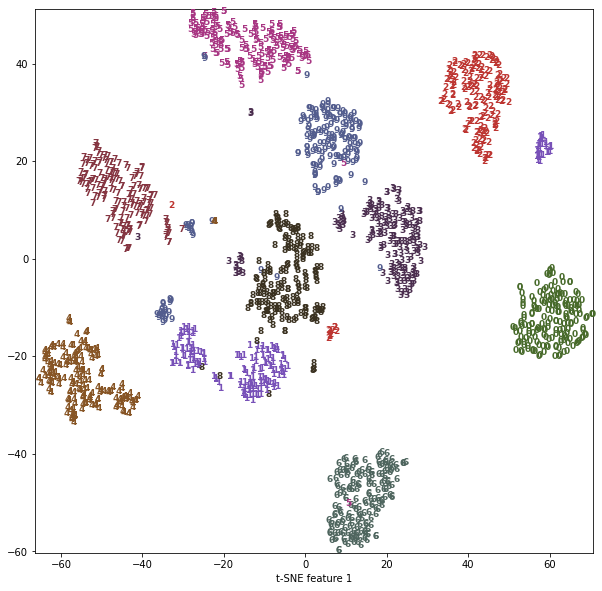

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

**The result of t-SNE is quite remarkable.** *All the classes are quite clearly separated*. The ones and nines are somewhat split up, but most of the classes form a single dense group. ***Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised.*** Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space.

The t-SNE algorithm has some tuning parameters, though it often works well with the default settings. You can try playing with **perplexity** and **early_exaggeration**.

**Task.** Here you have an example of using t-SNE for MNIST dataset. Apply in the same way t-SNE to BreastCancer dataset.


**Helping Resource on t-SNE:**

https://www.youtube.com/watch?v=NEaUSP4YerM
